<a href="https://colab.research.google.com/github/YousraJaf/Energy_Management-dashboard/blob/main/Forcasting_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import io
import pandas as pd

smarthome14 = files.upload()
smarthome15 = files.upload()
smarthome16 = files.upload()


Saving Home-meter1_2014.csv to Home-meter1_2014 (1).csv


Saving Home-meter1_2015.csv to Home-meter1_2015 (1).csv


Saving Home-meter1_2016.csv to Home-meter1_2016 (1).csv


In [4]:
smarthome14 = pd.read_csv(io.StringIO(smarthome14['Home-meter1_2014.csv'].decode('utf-8')))

In [5]:
smarthome15 = pd.read_csv(io.StringIO(smarthome15['Home-meter1_2015.csv'].decode('utf-8')))

In [6]:
smarthome16 = pd.read_csv(io.StringIO(smarthome16['Home-meter1_2016.csv'].decode('utf-8')))

In [7]:
weather14 = files.upload()
weather15 = files.upload()
weather16 = files.upload()

Saving home2014.csv to home2014 (1).csv


Saving home2015.csv to home2015 (1).csv


Saving home2016.csv to home2016 (1).csv


In [8]:
weather14 = pd.read_csv(io.StringIO(weather14['home2014.csv'].decode('utf-8')))
weather15 = pd.read_csv(io.StringIO(weather15['home2015.csv'].decode('utf-8')))
weather16 = pd.read_csv(io.StringIO(weather16['home2016.csv'].decode('utf-8')))


In [9]:
smarthome14['Date & Time'] = pd.to_datetime(smarthome14['Date & Time'])
smarthome14 = smarthome14.groupby(pd.Grouper(key="Date & Time", freq="1H")).mean().reset_index()

smarthome15['Date & Time'] = pd.to_datetime(smarthome15['Date & Time'])
smarthome15 = smarthome15.groupby(pd.Grouper(key="Date & Time", freq="1H")).mean().reset_index()

smarthome16['Date & Time'] = pd.to_datetime(smarthome16['Date & Time'])
smarthome16 = smarthome16.groupby(pd.Grouper(key="Date & Time", freq="1H")).mean().reset_index()

In [10]:
smarthome_frames = [smarthome14, smarthome15, smarthome16]
smarthome = pd.concat(smarthome_frames)
smarthome.head()

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
0 2014-01-01 00:00:00  1.968328  0.004075            1.968328   
1 2014-01-01 01:00:00  0.958388  0.004502            0.958388   
2 2014-01-01 02:00:00  1.163887  0.004596            1.163887   
3 2014-01-01 03:00:00  1.285365  0.004578            1.285365   
4 2014-01-01 04:00:00  1.093735  0.004579            1.093735   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.000041        0.135316        0.063264          0.039694   
1         0.000059        0.209315        0.202279          0.039048   
2         0.000042        0.252362        0.403214          0.038920   
3         0.000018        0.247542        0.456234          0.038869   
4         0.000030        0.228228        0.415661          0.038923   

   Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
0     0.141721          0.004252          0.009481         0.000215   
1     0.034233          0.004360          0.009776         0.000612   
2     0.039106          0.004470          0.009933         0.000552   
3     0.128803          0.004520          0.010022         0.000292   
4     0.012413          0.004494          0.010020         0.000562   

   Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  \
0         0.000074         0.000003   0.114562   0.039980        0.021757   
1         0.000036         0.000005   0.035337   0.000286        0.003600   
2         0.000053         0.000010   0.035443   0.000012        0.003248   
3         0.000166         0.000011   0.035580   0.000025        0.003287   
4         0.000036         0.000011   0.035521   0.000012        0.003257   

   Living room [kW]  Solar [kW]  
0          0.070239    0.004075  
1          0.006007    0.004502  
2          0.001632    0.004596  
3          0.001467    0.004578  
4          0.001469    0.004579

In [11]:
smarthome[smarthome.isnull().any(axis=1)]

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
1610 2014-03-09 02:00:00       NaN       NaN                 NaN   
1586 2015-03-08 02:00:00       NaN       NaN                 NaN   
1730 2016-03-13 02:00:00       NaN       NaN                 NaN   

      Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
1610              NaN             NaN             NaN               NaN   
1586              NaN             NaN             NaN               NaN   
1730              NaN             NaN             NaN               NaN   

      Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
1610          NaN               NaN               NaN              NaN   
1586          NaN               NaN               NaN              NaN   
1730          NaN               NaN               NaN              NaN   

      Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  \
1610              NaN              NaN        NaN        NaN             NaN   
1586              NaN              NaN        NaN        NaN             NaN   
1730              NaN              NaN        NaN        NaN             NaN   

      Living room [kW]  Solar [kW]  
1610               NaN         NaN  
1586               NaN         NaN  
1730               NaN         NaN

In [12]:
smarthome.drop([1610, 1586, 1730], inplace=True)

In [13]:
weather14['Date & Time'] = pd.to_datetime(weather14['time'],unit='s')
weather15['Date & Time'] = pd.to_datetime(weather15['time'],unit='s')
weather16['Date & Time'] = pd.to_datetime(weather16['time'],unit='s')

In [14]:
weather_frames = [weather14, weather15, weather16]
weather = pd.concat(weather_frames)
weather.head()

temperature         icon  humidity  visibility summary  \
0        20.28  clear-night      0.47        10.0   Clear   
1        19.28  clear-night      0.48        10.0   Clear   
2        18.35  clear-night      0.52        10.0   Clear   
3        17.67  clear-night      0.55        10.0   Clear   
4        16.04  clear-night      0.60        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover        time  \
0                 7.41   1023.26      13.21         0.0  1388552400   
1                 7.91   1023.27      10.07         0.0  1388556000   
2                 7.90   1024.32       8.43         0.0  1388559600   
3                 7.47   1025.00       7.90         0.0  1388563200   
4                 7.42   1025.17       5.81         0.0  1388566800   

   windBearing  precipIntensity  dewPoint  precipProbability  \
0        284.0              0.0      3.46                0.0   
1        284.0              0.0      2.98                0.0   
2        258.0              0.0      3.77                0.0   
3        246.0              0.0      4.41                0.0   
4        224.0              0.0      4.78                0.0   

          Date & Time  
0 2014-01-01 05:00:00  
1 2014-01-01 06:00:00  
2 2014-01-01 07:00:00  
3 2014-01-01 08:00:00  
4 2014-01-01 09:00:00

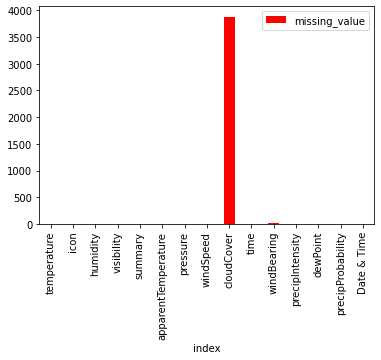

In [15]:
weather.isna().sum().reset_index(name="missing_value").plot.bar(x='index', y='missing_value', rot=90, color='red')

In [16]:
weather['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
weather['cloudCover'] = weather['cloudCover'].astype('float')

In [17]:
print(f"weather_temp_max: {weather['apparentTemperature'].max()}") # equivalent to 38.4°C
print(f"weather_temp_min: {weather['apparentTemperature'].min()}") # equivalent to -35.6°C
print(f"weather_temp_min: {weather['temperature'].max()}") # 93.72°F 

weather_temp_max: 101.12
weather_temp_min: -32.08
weather_temp_min: 93.72


In [18]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

weather['apparentTemperature_Celsius'] = fahr_to_celsius(weather['apparentTemperature'])
weather['temperature_Celsius'] = fahr_to_celsius(weather['temperature'])
weather.drop(['apparentTemperature', 'temperature'], axis=1, inplace=True)

In [19]:
df = pd.merge(smarthome, weather, on="Date & Time")
df.head()

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
0 2014-01-01 05:00:00  1.168823  0.004545            1.168823   
1 2014-01-01 06:00:00  1.657090  0.004555            1.657090   
2 2014-01-01 07:00:00  0.896792  0.003367            0.896792   
3 2014-01-01 08:00:00  0.775844  0.041327            0.775844   
4 2014-01-01 09:00:00  0.718553  0.169935            0.718553   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.000056        0.249262        0.427977          0.038838   
1         0.000059        0.392449        0.586473          0.038815   
2         0.000035        0.146684        0.355051          0.037568   
3         0.000046        0.158215        0.148285          0.037401   
4         0.000013        0.047124        0.276552          0.037233   

   Fridge [kW]  Wine cellar [kW]  ...  pressure  windSpeed  cloudCover  \
0     0.055253          0.004447  ...   1023.26      13.21         0.0   
1     0.113088          0.089954  ...   1023.27      10.07         0.0   
2     0.005416          0.004438  ...   1024.32       8.43         0.0   
3     0.063812          0.004288  ...   1025.00       7.90         0.0   
4     0.121314          0.004412  ...   1025.17       5.81         0.0   

         time  windBearing  precipIntensity  dewPoint  precipProbability  \
0  1388552400        284.0              0.0      3.46                0.0   
1  1388556000        284.0              0.0      2.98                0.0   
2  1388559600        258.0              0.0      3.77                0.0   
3  1388563200        246.0              0.0      4.41                0.0   
4  1388566800        224.0              0.0      4.78                0.0   

   apparentTemperature_Celsius temperature_Celsius  
0                   -13.661111           -6.511111  
1                   -13.383333           -7.066667  
2                   -13.388889           -7.583333  
3                   -13.627778           -7.961111  
4                   -13.655556           -8.866667  

[5 rows x 33 columns]

In [20]:
df.dropna(inplace=True)

In [21]:
for col in df.columns:
    #print(col)
    df.rename(columns={col:col.replace(' [kW]', '')}, inplace=True)

In [22]:
df['Furnace'] = df[['Furnace 1', 'Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12', 'Kitchen 14', 'Kitchen 38']].sum(axis=1)

In [23]:
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38', 'time'], axis=1, inplace=True)

In [24]:
df_corr = df.corr()
df_corr.head()

use       gen  House overall  Dishwasher  Home office  \
use            1.000000 -0.228577       1.000000    0.203736     0.193372   
gen           -0.228577  1.000000      -0.228577    0.077320    -0.075268   
House overall  1.000000 -0.228577       1.000000    0.203736     0.193372   
Dishwasher     0.203736  0.077320       0.203736    1.000000     0.120171   
Home office    0.193372 -0.075268       0.193372    0.120171     1.000000   

                 Fridge  Wine cellar  Garage door      Barn      Well  ...  \
use            0.156185     0.089119     0.047372  0.156527  0.161768  ...   
gen            0.016984     0.095768     0.076724  0.115694  0.079100  ...   
House overall  0.156185     0.089119     0.047372  0.156527  0.161768  ...   
Dishwasher     0.058681     0.005660     0.010745  0.035407  0.045236  ...   
Home office    0.069890     0.016669    -0.015292 -0.064963 -0.004344  ...   

               windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
use             0.153779    0.049133     0.066228         0.030202 -0.125505   
gen            -0.101738   -0.094685    -0.011657        -0.061184  0.093984   
House overall   0.153779    0.049133     0.066228         0.030202 -0.125505   
Dishwasher      0.041815   -0.006389     0.000257         0.021723 -0.021446   
Home office     0.118349    0.015337     0.016806         0.030061  0.054156   

               precipProbability  apparentTemperature_Celsius  \
use                     0.037456                    -0.081000   
gen                    -0.086840                     0.051480   
House overall           0.037456                    -0.081000   
Dishwasher              0.008124                    -0.002011   
Home office             0.030101                     0.121739   

               temperature_Celsius   Furnace   Kitchen  
use                      -0.064001  0.535761  0.167673  
gen                       0.041994 -0.178646 -0.041085  
House overall            -0.064001  0.535761  0.167673  
Dishwasher               -0.000133 -0.017961  0.022419  
Home office               0.132001 -0.033519  0.063447  

[5 rows x 26 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
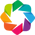

In [25]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
corr_heatmap = hv.HeatMap((df_corr.columns, df_corr.index, df_corr > 0.95))
corr_heatmap.opts(tools=['hover'], width=1200, height=500, title='Correlation Heatmap', xrotation = 90, colorbar=True, clim=(-1, 1), invert_yaxis=True)
corr_heatmap * hv.Labels(corr_heatmap).opts(text_color='white')

:Overlay
   .HeatMap.I :HeatMap   [x,y]   (z)
   .Labels.I  :Labels   [x,y]   (z)

In [27]:
df['HO_use'] = df['use']
df['Sol_gen'] = df['gen']
df.drop(['use','House overall','gen','Solar'], axis=1, inplace=True)
df.head(3)

Date & Time  Dishwasher  Home office    Fridge  Wine cellar  \
0 2014-01-01 05:00:00    0.000056     0.038838  0.055253     0.004447   
1 2014-01-01 06:00:00    0.000059     0.038815  0.113088     0.089954   
2 2014-01-01 07:00:00    0.000035     0.037568  0.005416     0.004438   

   Garage door      Barn      Well  Microwave  Living room  ... windBearing  \
0     0.009865  0.035309  0.000021   0.003249     0.001462  ...       284.0   
1     0.009676  0.035115  0.000016   0.003197     0.001489  ...       284.0   
2     0.009929  0.035053  0.000019   0.003256     0.001630  ...       258.0   

   precipIntensity  dewPoint precipProbability  apparentTemperature_Celsius  \
0              0.0      3.46               0.0                   -13.661111   
1              0.0      2.98               0.0                   -13.383333   
2              0.0      3.77               0.0                   -13.388889   

   temperature_Celsius   Furnace   Kitchen    HO_use   Sol_gen  
0            -6.511111  0.677239  0.000579  1.168823  0.004545  
1            -7.066667  0.978922  0.000405  1.657090  0.004555  
2            -7.583333  0.501735  0.000645  0.896792  0.003367  

[3 rows x 27 columns]

In [28]:
df['year'] = df['Date & Time'].dt.year # df['year'] = df['Date & Time'].apply(lambda x : x.year)
df['month'] = df['Date & Time'].dt.month
df['day'] = df['Date & Time'].dt.day
df['weekday'] = df['Date & Time'].dt.day_name()
df['weekofyear'] = df['Date & Time'].dt.isocalendar().week # df['Date & Time'].dt.isocalendar()[['week']]
df['hour'] = df['Date & Time'].dt.hour

In [29]:
def periods(x):
    if x in (23, 0, 1, 2, 3, 4, 5):
        period = 'Night'
    elif x in range(5, 9):
        period = 'Morning'
    elif x in range(9, 11):
        period = 'forenoon'
    elif x in range(11, 14):
        period = 'Noon'
    elif x in range(14, 18):
        period = 'Afternoon'
    elif x in range(18, 23):
        period = 'Evening'
    else:
        period = 'None'
    return period    

df['periodsofday'] = df['hour'].apply(periods)
df.periodsofday.unique()

array(['Night', 'Morning', 'forenoon', 'Noon', 'Afternoon', 'Evening'],
      dtype=object)

In [30]:
def groupbymonth(col):
    return df[[col, 'month']].groupby(by='month').agg({col:'mean'})[col]

In [31]:
def groupbyweekday(col):
    weekdaydf = df.groupby('weekday').agg({col:['mean']})
    weekdaydf.columns = [f"{i[0]}_{i[1]}" for i in weekdaydf.columns]
    weekdaydf['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekdaydf.index]
    weekdaydf.sort_values('week_num', inplace=True)
    weekdaydf.drop('week_num', axis=1, inplace=True)
    return weekdaydf

In [32]:
def groupbyperiods(col):
    periodsdf = df.groupby('periodsofday').agg({col:['mean']})
    periodsdf.columns = [f"{i[0]}_{i[1]}" for i in periodsdf.columns]
    periodsdf['periods_num'] = [['Morning', 'forenoon', 'Noon', 'Afternoon', 'Evening', 'Night'].index(i) for i in periodsdf.index]
    periodsdf.sort_values('periods_num', inplace=True)
    periodsdf.drop(['periods_num'], axis=1, inplace=True)
    return periodsdf

In [33]:
# df_day = df.set_index("Date & Time").groupby(pd.Grouper(freq='1D')).mean()
# df_month = df.set_index("Date & Time").groupby(pd.Grouper(freq='1M')).mean()
df.set_index('Date & Time', inplace=True)

In [34]:
df.rename({'windSpeed': 'windspeed', 
           'windBearing': 'windbearing',
           'precipIntensity': 'precipitation_intensity', 
           'dewPoint': 'dewpoint', 
           'precipProbability': 'precipitation_probability',
           'apparentTemperature_Celsius': 'apparent_temperature', 
           'temperature_Celsius': 'temperature'
          }, axis=1, inplace=True)

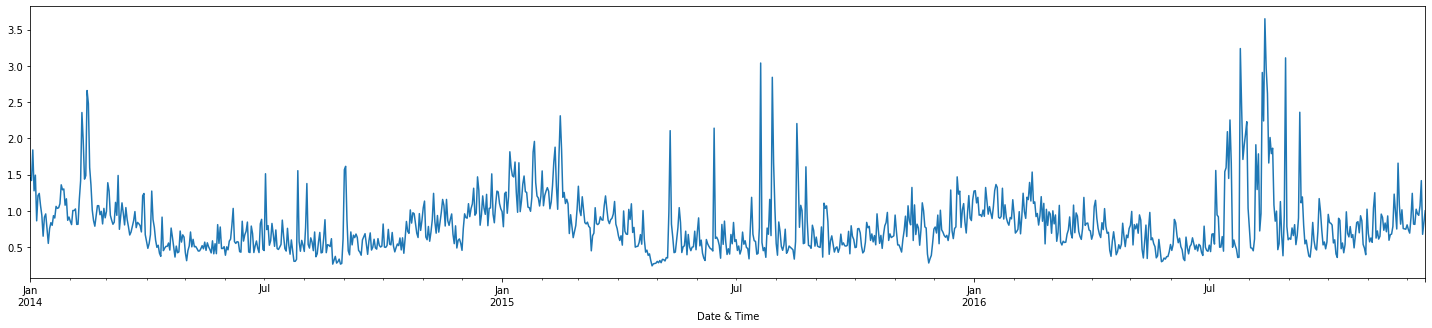

In [35]:
# fig, axes = plt.subplots(nrows=2, ncols=1)
# dataset['use'].resample('D').mean().plot(ax=axes[0]) #D calendar day frequency
# dataset['House overall'].resample('D').mean().plot(ax=axes[1]) #D calendar day frequency
df['HO_use'].resample('D').mean().plot(figsize=(25,5)) #D calendar day frequency

In [36]:
df['icon'].value_counts()

clear-night            8938
clear-day              8205
partly-cloudy-day      2007
partly-cloudy-night    1218
rain                   1061
cloudy                  356
snow                    178
wind                    109
fog                      37
Name: icon, dtype: int64

In [37]:
df['summary'].value_counts()

Clear                       17142
Partly Cloudy                2988
Light Rain                    655
Overcast                      356
Drizzle                       276
Mostly Cloudy                 237
Rain                          126
Light Snow                     92
Breezy                         75
Flurries                       57
Foggy                          37
Breezy and Partly Cloudy       28
Snow                           25
Heavy Snow                      3
Breezy and Mostly Cloudy        3
Windy and Partly Cloudy         2
Heavy Rain                      2
Breezy and Overcast             1
Light Rain and Breezy           1
Rain and Breezy                 1
Flurries and Breezy             1
Dry                             1
Name: summary, dtype: int64

In [38]:
df.drop(columns=['summary', 'icon'], inplace=True)

### Check For Stationarity

In [39]:
# statistical	ADG (Augmented Dickey-Fuller) Test

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [40]:
adf_test(df['HO_use']) # p-value is the probability, should be as small as possible, if p-value is higher, e.g. 0.5/0.8, then the dataset is not stationary (ideally is should less than 0.05)

1. ADF :  -11.503437782290908
2. P-Value :  4.434359280634746e-21
3. Num Of Lags :  47
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 22061
5. Critical Values :
	 1% :  -3.4306464535176766
	 5% :  -2.861671022709971
	 10% :  -2.566839739691255


## ARIMA and Seasonal ARIMA

#### Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

Visualize the Time Series Data
Make the time series data stationary
Plot the Correlation and AutoCorrelation Charts
Construct the ARIMA Model or Seasonal ARIMA based on the data
Use the model to make predictions
Let's go through these steps!

In [41]:
pip install pmdarima

In [42]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
dfd = df.resample('D').mean()
dfd.shape

(1080, 29)

In [44]:
stepwise_fit = auto_arima(dfd['HO_use'], 
                          suppress_warnings=True) 

# stepwise_fit = auto_arima(HOusedf['HO_use'], trace=True
#                           suppress_warnings=True) # trace will print out, as its iterating through every steps        

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1080
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -266.993
Date:                Wed, 13 Apr 2022   AIC                            543.985
Time:                        07:32:42   BIC                            568.909
Sample:                             0   HQIC                           553.423
                               - 1080                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0105      0.004      2.549      0.011       0.002       0.019
ar.L1          1.3931      0.025     55.032      0.000       1.344       1.443
ar.L2         -0.4059      0.023    -17.615      0.000      -0.451      -0.361
ma.L1         -0.9008      0.017    -51.591      0.000      -0.935      -0.867
sigma2         0.0958      0.002     52.300      0.000       0.092       0.099
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             13615.05
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             2.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

auto-arima will try out different combinations of orders, 100, 010, 001 and for every model/order, it's going to assign a score (AIC), the goal is to minimize the AIC. AIC can be seen if, trace=True. the best model is with the order (2,0,1). Although it's written SARIMAX, with no seasonality, it's actually a SAMIRA model. Now we'll begin with actual fitting the model...

In [45]:
from statsmodels.tsa.arima_model import ARIMA

#### Split Data into Training and Testing

In [46]:
#print(dfd.shape)
train=dfd.iloc[:-180]
test=dfd.iloc[-180:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(900, 29) (180, 29)


Train the Model

In [47]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train['HO_use'],order=(2,0,1)) # without the hwlp of autocorrelation and partial autocorrelation
model = model.fit()
model.summary()

# from statsmodels.tsa.arima_model import ARIMA
# model=ARIMA(train['AvgTemp'],order=(1,0,5))
# model=model.fit()
# model.summary()

#https://stackoverflow.com/questions/67601211/futurewarning-statsmodels-tsa-arima-model-arma-and-statsmodels-tsa-arima-model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 HO_use   No. Observations:                  900
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -75.826
Date:                Wed, 13 Apr 2022   AIC                            161.653
Time:                        07:32:56   BIC                            185.665
Sample:                    01-01-2014   HQIC                           170.825
                         - 06-18-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8269      0.098      8.403      0.000       0.634       1.020
ar.L1          1.3427      0.033     40.593      0.000       1.278       1.408
ar.L2         -0.3530      0.029    -12.208      0.000      -0.410      -0.296
ma.L1         -0.8991      0.025    -35.893      0.000      -0.948      -0.850
sigma2         0.0684      0.001     48.935      0.000       0.066       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11902.05
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Make Predictions on Test Set

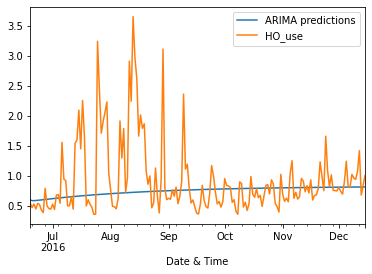

In [48]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['HO_use'].plot(legend=True)

In [49]:
print(pred)

2016-06-19    0.595073
2016-06-20    0.585724
2016-06-21    0.584917
2016-06-22    0.587134
2016-06-23    0.590395
                ...   
2016-12-11    0.812219
2016-12-12    0.812456
2016-12-13    0.812689
2016-12-14    0.812919
2016-12-15    0.813145
Freq: D, Name: ARIMA predictions, Length: 180, dtype: float64


Evaluate the model

In [50]:
test['HO_use'].mean()

0.9301320276401092

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['HO_use']))
print(rmse)

0.6349054129932642


if the root mean square error is very similar in range to the mean of the data set, then it becomes a bad model.

# Time-Series Prediction with LSTM
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning (DL).

In [55]:
dfd['HO_use'].head()

Date & Time
2014-01-01    1.454995
2014-01-02    1.418620
2014-01-03    1.840295
2014-01-04    1.276397
2014-01-05    1.492142
Freq: D, Name: HO_use, dtype: float64

In [56]:
dfd.shape

(1080, 29)

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose # will going to decompose different parts of time series

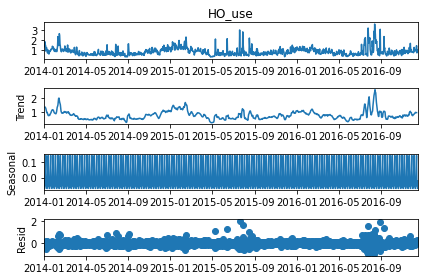

In [61]:
results = seasonal_decompose(dfd['HO_use'])
results.plot();

In [72]:
#len(dfd) # 1080
train=dfd['HO_use'].iloc[:-180] 
test=dfd['HO_use'].iloc[-180:] # last 6 months

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [87]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

ValueError: ignored

In [66]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
# we'll give a sequence of data to the neural network
# define generator
n_input = 3
n_features = 1 # can be more than one, if you're doing multiple time series
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [71]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[4.92086736e-01 1.56196475e-01 5.09829095e-01 1.14097905e-01
 4.02036355e-02 1.78953857e-01 4.67259838e-02 3.84846869e-01
 1.84707281e-01 3.58031272e-01 9.94028960e-01 6.89247436e-01
 3.22894238e-01 1.15422055e-02 7.62339573e-01 0.00000000e+00
 3.01828437e-01 0.00000000e+00 3.23215469e-01 2.92968959e-01
 5.39963078e-01 2.73124643e-01 4.33746129e-01 3.44119775e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.78148148e-01 2.59454123e-04 1.14814020e-01 3.63729858e-01
 9.63987559e-02 5.48562110e-03 3.56001646e-01 4.30458856e-03
 2.41529033e-01 2.09948306e-01 6.55650320e-01 4.73503508e-01
 6.87756534e-01 1.54196145e-01 3.61424002e-01 2.54912918e-01
 2.47245900e-02 3.63690845e-01 7.42085098e-02 3.49207065e-01
 2.79164663e-01 6.83867414e-01 0.00000000e+00 4.20739185e-01
 1.60430936e-02 0.00000000e+00 0.00000000e+00 3.33333333e-02
 0.00000000e+00 1.95555556e-01 5.71262075e-01 3.31760019e-01
 4.31436446e-01 1.05125311e-01 2.58610543e-02 6.51017793e-01
 8.084

In [78]:
X.shape

(1, 3, 29)

In [79]:
# We do the same thing, but now instead for 6 months
n_input = 6
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [81]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features))) # 100 neuron with relu activation function
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(generator,epochs=50)

Epoch 1/50


InvalidArgumentError: ignored

In [110]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [110]:
last_train_batch = scaled_train[-12:]

In [110]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
test.head()

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

# Time-Series Prediction using Prophet

In [92]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639596 sha256=dc933c2ac230eb20e11896635c943fb4a59cdef0743822b58b85e78c075affb8
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [93]:
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [98]:
HOusedf = df['HO_use'].resample('D').mean()
HOusedf = HOusedf.to_frame()
HOusedf

HO_use
Date & Time          
2014-01-01   1.454995
2014-01-02   1.418620
2014-01-03   1.840295
2014-01-04   1.276397
2014-01-05   1.492142
...               ...
2016-12-11   1.070948
2016-12-12   1.417207
2016-12-13   0.676709
2016-12-14   0.840320
2016-12-15   1.001583

[1080 rows x 1 columns]

In [99]:
HOusedf.reset_index(inplace=True)

In [100]:
HOusedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date & Time  1080 non-null   datetime64[ns]
 1   HO_use       1080 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB


#### Extracting Holidays

In [101]:
import holidays
import datetime

In [102]:
us_holidays_dates = []

for date in holidays.UnitedStates(years=2014).items():
  us_holidays_dates.append(str(date[0]))

for date in holidays.UnitedStates(years=2015).items():
  us_holidays_dates.append(str(date[0]))  

for date in holidays.UnitedStates(years=2016).items():
  us_holidays_dates.append(str(date[0])) 

us_holidays_dates

['2014-01-01',
 '2014-01-20',
 '2014-02-17',
 '2014-05-26',
 '2014-07-04',
 '2014-09-01',
 '2014-10-13',
 '2014-11-11',
 '2014-11-27',
 '2014-12-25',
 '2015-01-01',
 '2015-01-19',
 '2015-02-16',
 '2015-05-25',
 '2015-07-04',
 '2015-07-03',
 '2015-09-07',
 '2015-10-12',
 '2015-11-11',
 '2015-11-26',
 '2015-12-25',
 '2016-01-01',
 '2016-01-18',
 '2016-02-15',
 '2016-05-30',
 '2016-07-04',
 '2016-09-05',
 '2016-10-10',
 '2016-11-11',
 '2016-11-24',
 '2016-12-25',
 '2016-12-26']

In [103]:
us_holidays_names = []

for date in holidays.UnitedStates(years=2014).items():
  us_holidays_names.append(str(date[1]))

for date in holidays.UnitedStates(years=2015).items():
  us_holidays_names.append(str(date[1]))  

for date in holidays.UnitedStates(years=2016).items():
  us_holidays_names.append(str(date[1])) 

us_holidays_names

["New Year's Day",
 'Martin Luther King Jr. Day',
 "Washington's Birthday",
 'Memorial Day',
 'Independence Day',
 'Labor Day',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving',
 'Christmas Day',
 "New Year's Day",
 'Martin Luther King Jr. Day',
 "Washington's Birthday",
 'Memorial Day',
 'Independence Day',
 'Independence Day (Observed)',
 'Labor Day',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving',
 'Christmas Day',
 "New Year's Day",
 'Martin Luther King Jr. Day',
 "Washington's Birthday",
 'Memorial Day',
 'Independence Day',
 'Labor Day',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving',
 'Christmas Day',
 'Christmas Day (Observed)']

In [105]:
# print(len(us_holidays_dates))
# print(len(us_holidays_names))

us_holidays = list(zip(us_holidays_dates, us_holidays_names))
us_holidays

[('2014-01-01', "New Year's Day"),
 ('2014-01-20', 'Martin Luther King Jr. Day'),
 ('2014-02-17', "Washington's Birthday"),
 ('2014-05-26', 'Memorial Day'),
 ('2014-07-04', 'Independence Day'),
 ('2014-09-01', 'Labor Day'),
 ('2014-10-13', 'Columbus Day'),
 ('2014-11-11', 'Veterans Day'),
 ('2014-11-27', 'Thanksgiving'),
 ('2014-12-25', 'Christmas Day'),
 ('2015-01-01', "New Year's Day"),
 ('2015-01-19', 'Martin Luther King Jr. Day'),
 ('2015-02-16', "Washington's Birthday"),
 ('2015-05-25', 'Memorial Day'),
 ('2015-07-04', 'Independence Day'),
 ('2015-07-03', 'Independence Day (Observed)'),
 ('2015-09-07', 'Labor Day'),
 ('2015-10-12', 'Columbus Day'),
 ('2015-11-11', 'Veterans Day'),
 ('2015-11-26', 'Thanksgiving'),
 ('2015-12-25', 'Christmas Day'),
 ('2016-01-01', "New Year's Day"),
 ('2016-01-18', 'Martin Luther King Jr. Day'),
 ('2016-02-15', "Washington's Birthday"),
 ('2016-05-30', 'Memorial Day'),
 ('2016-07-04', 'Independence Day'),
 ('2016-09-05', 'Labor Day'),
 ('2016-10-10'

In [113]:
us_holidays = pd.DataFrame(us_holidays, columns = ["ds", "holiday"])

In [114]:
# us_holidays = pd.DataFrame({
#   'ds': pd.to_datetime(us_holidays),
#   'lower_window': 0,
#   'upper_window': 0,
# })
us_holidays.head()

ds                     holiday
0  2014-01-01              New Year's Day
1  2014-01-20  Martin Luther King Jr. Day
2  2014-02-17       Washington's Birthday
3  2014-05-26                Memorial Day
4  2014-07-04            Independence Day

The lower_window and upper_window values are set to zero to indicate that we don't want Prophet to consider any other months than the ones listed.

#### Change Column Names for FB Prophet

In [106]:
HOusedf.columns = ['ds','y']
#HOusedf['ds'] = pd.to_datetime(HOusedf['ds'])
HOusedf.tail()

ds         y
1075 2016-12-11  1.070948
1076 2016-12-12  1.417207
1077 2016-12-13  0.676709
1078 2016-12-14  0.840320
1079 2016-12-15  1.001583

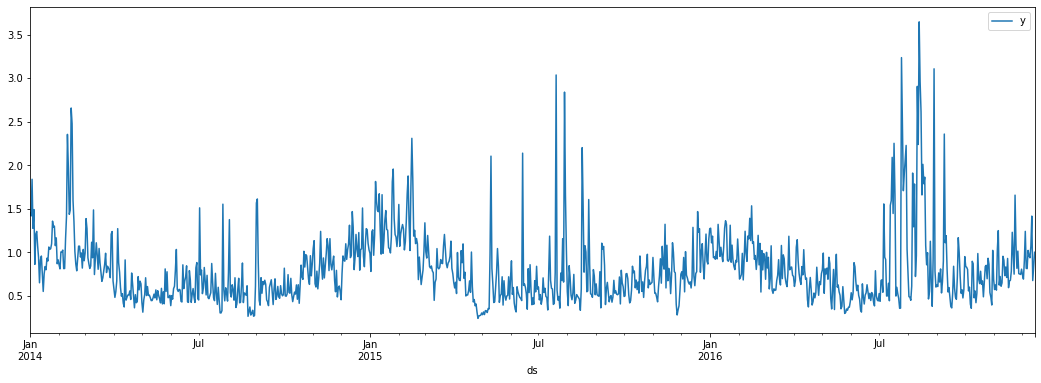

In [107]:
#Plot Your Data
HOusedf.plot(x='ds',y='y',figsize=(18,6))

In [108]:
len(HOusedf)

1080

### Train, Test Split

In [109]:
train = HOusedf.iloc[:len(HOusedf)-180]
test = HOusedf.iloc[len(HOusedf)-180:] # last 6 months to test

#### Start Making Predictions

In [110]:
dir(Prophet) # prints inbuilt function

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [115]:
m = Prophet(holidays=us_holidays, weekly_seasonality=True, daily_seasonality=True) # m = Prophet(holidays=us_holidays, weekly_seasonality=True, daily_seasonality=True)
m.fit(train)
future = m.make_future_dataframe(periods=180, freq='D') #freq is by default daily. but freq=MS for monthly and H for hourly
forecast = m.predict(future)

In [116]:
m.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  "New Year's Day",
  'Martin Luther King Jr. Day',
  "Washington's Birthday",
  'Memorial Day',
  'Independence Day',
  'Labor Day',
  'Columbus Day',
  'Veterans Day',
  'Thanksgiving',
  'Christmas Day',
  'Independence Day (Observed)',
  'Christmas Day (Observed)',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [117]:
future.tail()

ds
1075 2016-12-11
1076 2016-12-12
1077 2016-12-13
1078 2016-12-14
1079 2016-12-15

In [118]:
forecast.tail() #yhat col is the prediction, also gives an upper and lower range for the prediction

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1075 2016-12-11  1.240367    0.506136    1.200921     1.233989     1.245211   
1076 2016-12-12  1.240160    0.557567    1.233263     1.233712     1.245053   
1077 2016-12-13  1.239953    0.427819    1.134184     1.233437     1.244890   
1078 2016-12-14  1.239746    0.451987    1.141887     1.233171     1.244710   
1079 2016-12-15  1.239539    0.433519    1.094432     1.232909     1.244529   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
1075            0.0                  0.0                  0.0   
1076            0.0                  0.0                  0.0   
1077            0.0                  0.0                  0.0   
1078            0.0                  0.0                  0.0   
1079            0.0                  0.0                  0.0   

      Christmas Day (Observed)  ...    weekly  weekly_lower  weekly_upper  \
1075                       0.0  ...  0.074345      0.074345      0.074345   
1076                       0.0  ...  0.110900      0.110900      0.110900   
1077                       0.0  ... -0.030416     -0.030416     -0.030416   
1078                       0.0  ... -0.004150     -0.004150     -0.004150   
1079                       0.0  ... -0.075038     -0.075038     -0.075038   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
1075  0.090831      0.090831      0.090831                   0.0   
1076  0.108445      0.108445      0.108445                   0.0   
1077  0.126969      0.126969      0.126969                   0.0   
1078  0.146243      0.146243      0.146243                   0.0   
1079  0.166090      0.166090      0.166090                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
1075                         0.0                         0.0  0.838175  
1076                         0.0                         0.0  0.892137  
1077                         0.0                         0.0  0.769138  
1078                         0.0                         0.0  0.814471  
1079                         0.0                         0.0  0.763223  

[5 rows x 61 columns]

In [119]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # make prediction up till the end of test set

ds      yhat  yhat_lower  yhat_upper
1075 2016-12-11  0.838175    0.506136    1.200921
1076 2016-12-12  0.892137    0.557567    1.233263
1077 2016-12-13  0.769138    0.427819    1.134184
1078 2016-12-14  0.814471    0.451987    1.141887
1079 2016-12-15  0.763223    0.433519    1.094432

In [131]:
test.tail()

ds         y
1075 2016-12-11  1.070948
1076 2016-12-12  1.417207
1077 2016-12-13  0.676709
1078 2016-12-14  0.840320
1079 2016-12-15  1.001583

#### USING BUILT-IN FB PROPHET VISUALIZATION

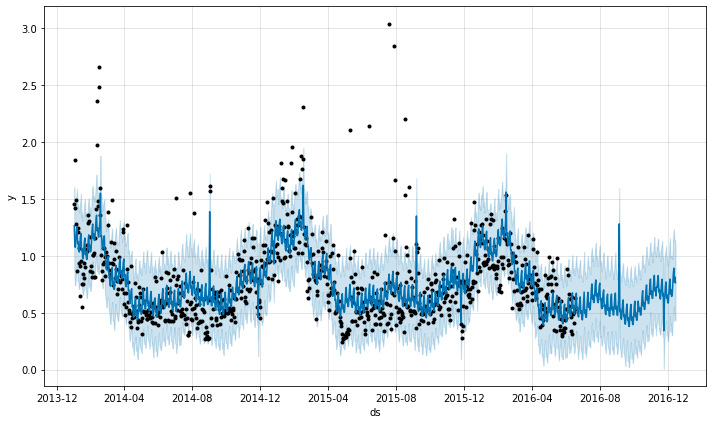

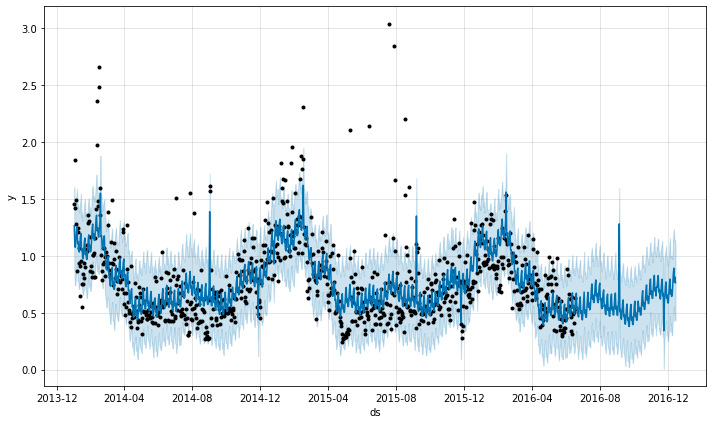

In [121]:
m.plot(forecast)

In [122]:
plot_plotly(m ,forecast) # black dots are actual values and blue lines are nothing but prediction, the shadded region is upper and lower bound (yhat_upper, yhat_lower)

In [123]:
# visualize each components [Trends, yearly, weekly]
plot_components_plotly(m, forecast)

#### Evaluate Your Model

In [124]:
from statsmodels.tools.eval_measures import rmse

In [125]:
predictions = forecast.iloc[-180:]['yhat']

In [126]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  0.6820323750231212
Mean Value of Test Dataset: 0.9301320276401092


#### prophet cross validation

In [127]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='400 days', period='90 days', horizon = '180 days') #I did not get the concept of cut off dates and forecast periods
df_cv.head() # yhat predicted value and y real value

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-26 00:00:00 and 2015-12-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2015-03-27  0.832741    0.514189    1.150634  0.897861 2015-03-26
1 2015-03-28  0.948764    0.652292    1.239867  0.955613 2015-03-26
2 2015-03-29  1.004270    0.698236    1.299182  1.129561 2015-03-26
3 2015-03-30  0.868283    0.578443    1.158514  0.816702 2015-03-26
4 2015-03-31  0.831035    0.545811    1.134684  0.755648 2015-03-26

In [128]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 18 days  0.039540  0.198846  0.150780  0.228499  0.149871  0.847222
1 19 days  0.042830  0.206954  0.155049  0.228529  0.151200  0.847222
2 20 days  0.042855  0.207014  0.156249  0.228192  0.151200  0.847222
3 21 days  0.042938  0.207214  0.156539  0.228625  0.151200  0.847222
4 22 days  0.041917  0.204735  0.152739  0.222047  0.148883  0.847222

In [129]:
#df_p

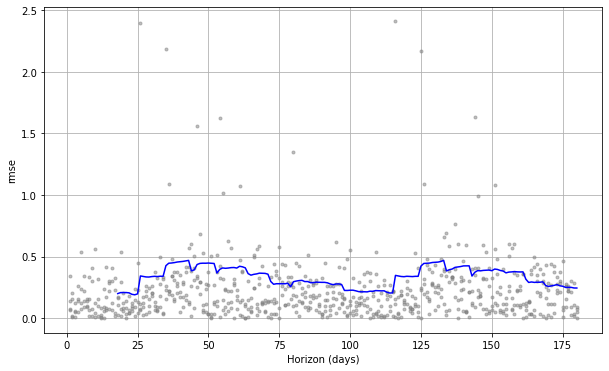

In [130]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')